In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import gc
import io
import os
from itertools import combinations

from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)

pd.reset_option('display.float_format')
pd.set_option('display.max_colwidth', None)  

from sitecustomize import ROOT # lib này được khởi tạo ban đầu dự án

import helpers.view as view
import helpers.EDA as EDA

importlib.reload(view)
importlib.reload(EDA)

<module 'helpers.EDA' from 'd:\\Data Science\\helpers\\EDA.py'>

In [2]:
def cache_clear():
    for var in list(globals()):  
        if var not in _keep_vars and not var.startswith("_"):  
            del globals()[var]  

    gc.collect()
_keep_vars = set(globals().keys())  # lưu biến gốc

# train test

In [3]:
train = pd.read_pickle(ROOT + "/data/pkl/application_train.p")

In [4]:
test = pd.read_pickle(ROOT + "/data/pkl/application_test.p")

In [5]:
obj_features = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']

In [6]:
con_features = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

# feature engineering

In [7]:
train["data"] = 1
test["data"] = 0

In [8]:
trte = pd.concat([train, test], ignore_index=True)

In [51]:
trte

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,...,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,data
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,...,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,

## categorical features

In [10]:
import lightgbm as lgb
import multiprocessing
from gplearn.genetic import SymbolicTransformer

In [11]:
SEED = 71
param = {
         'objective': 'binary',
         'metric': 'auc',
         'learning_rate': 0.05,
         'max_depth': -1,
         'num_leaves': 255,
         'max_bin': 255,
         'colsample_bytree': 0.5,
         'subsample': 0.5,
         'nthread': multiprocessing.cpu_count(),
         'bagging_freq': 1,
         
         'seed': SEED
         }

categorical_feature = ['NAME_CONTRACT_TYPE',
                     'CODE_GENDER',
                     'FLAG_OWN_CAR',
                     'FLAG_OWN_REALTY',
                     'NAME_TYPE_SUITE',
                     'NAME_INCOME_TYPE',
                     'NAME_EDUCATION_TYPE',
                     'NAME_FAMILY_STATUS',
                     'NAME_HOUSING_TYPE',
                     'OCCUPATION_TYPE',
                     'WEEKDAY_APPR_PROCESS_START',
                     'ORGANIZATION_TYPE',
                     'FONDKAPREMONT_MODE',
                     'HOUSETYPE_MODE',
                     'WALLSMATERIAL_MODE',
                     'EMERGENCYSTATE_MODE']

In [12]:
X = train.drop(["TARGET", "data", "SK_ID_CURR"], axis=1)
y = train["TARGET"]

In [13]:
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

### cv (cross validation) benchmark

In [14]:
dtrain = lgb.Dataset(X, y, categorical_feature=categorical_feature)

In [15]:
ret = lgb.cv(param, dtrain, 9999, nfold=5,
             callbacks=[lgb.early_stopping(50), lgb.log_evaluation(10)],
             seed=SEED)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11318
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 116
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11318
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 116
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077249 seconds.
You can set `force_col_wise=true

In [16]:
ret['valid auc-mean'][-1]

0.7487164114101413

### cv encoding

#### leave one out encode

In [17]:
import category_encoders as ce

In [18]:
enc = ce.LeaveOneOutEncoder(cols=categorical_feature) # looe

In [19]:
X = enc.fit_transform(X, y)

In [20]:
dtrain = lgb.Dataset(X, y, categorical_feature=categorical_feature)

In [21]:
ret = lgb.cv(param, dtrain, 9999, nfold=5,
             callbacks=[lgb.early_stopping(50), lgb.log_evaluation(10)],
             seed=SEED)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11168
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 100
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11168
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 100
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

In [22]:
ret["valid auc-mean"][-1]

0.7429799759334814

#### label encode

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # label encode

In [24]:
_X = X.copy()
_y = y.copy()

In [25]:
for c in categorical_feature:
    most_frequent = _X[c].mode()[0]
    _X[c].fillna(most_frequent, inplace=True)
    _X[c] = le.fit_transform(_X[c])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12568\2638517965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  _X[c].fillna(most_frequent, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12568\2638517965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [26]:
_X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2,3,2,0,0,202500.0,406597.5,24700.5,351000.0,9,7,6,7,2,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,28,1.0,2,2,10,10,0,0,0,0,0,0,84,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,...,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,4,0,0.0149,6,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,2,3,3,0,270000.0,1293502.5,35698.5,1129500.0,5,4,3,4,3,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,9,2.0,1,1,1,11,0,0,0,0,0,0,27,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,5,1,0.0714,5,1,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,4,1,1,0,67500.0,135000.0,6750.0,135000.0,10,8,7,8,3,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,29,1.0,2,2,1,9,0,0,0,0,0,0,47,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,5,NaN,13,3,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2,3,1,0,135000.0,312682.5,29686.5,297000.0,10,8,7,10,3,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,29,2.0,2,2,11,17,0,0,0,0,0,0,85,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,5,NaN,13,3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3,4,3,1,0,121500.0,513000.0,21865.5,513000.0,10,8,7,8,3,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,9,1.0,2,2,7,11,0,0,0,0,1,1,28,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,5,NaN,13,3,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
dtrain = lgb.Dataset(_X, _y, categorical_feature=categorical_feature)
ret = lgb.cv(param, dtrain, 9999, nfold=5,
             callbacks=[lgb.early_stopping(50), lgb.log_evaluation(10)],
             seed=SEED)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11451
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 116
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11451
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 116
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019777 seconds.
You can set `force_row_wise=true

In [28]:
ret["valid auc-mean"][-1]

1.0

#### target encode

In [29]:
enc = ce.TargetEncoder(cols=categorical_feature)

In [30]:
_X = X.copy()
_y = y.copy()

In [31]:
_X = enc.fit_transform(_X, _y)

In [32]:
for c in categorical_feature:
    most_frequent = _X[c].mode()[0]
    _X[c].fillna(most_frequent, inplace=True)
    _X[c] = le.fit_transform(_X[c])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12568\2638517965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  _X[c].fillna(most_frequent, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12568\2638517965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [33]:
dtrain = lgb.Dataset(X, y, categorical_feature=categorical_feature)

In [34]:
ret = lgb.cv(param, dtrain, 9999, nfold=5,
             callbacks=[lgb.early_stopping(50), lgb.log_evaluation(10)],
             seed=SEED)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11168
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 100
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11168
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 100
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead o

In [35]:
ret["valid auc-mean"][-1]

0.7429799759334814

## continuous features

In [9]:
trte = pd.concat([train, test], ignore_index=True)

In [10]:
docs = [_f for _f in trte.columns if 'FLAG_DOC' in _f] # lấy FLAG DOCUMENT
live = [_f for _f in trte.columns if ('FLAG_' in _f) & ('FLAG_DOC' not in _f)] # lấy FLAG trừ FLAG DOCUMENT
inc_by_org = trte[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL'] # trung vị tổng thu nhập group by ORGANIZATION_TYPE (ORGANIZATION_TYPE quá nhiều giá trị)

In [11]:
trte['CODE_GENDER'] = 1 - (trte['CODE_GENDER']=='F')*1 # 4 'XNA' thay bằng 'M' => 1
trte['FLAG_OWN_CAR'] = (trte['FLAG_OWN_CAR']=='Y')*1
trte['FLAG_OWN_REALTY'] = (trte['FLAG_OWN_REALTY']=='Y')*1
trte['EMERGENCYSTATE_MODE'] = (trte['EMERGENCYSTATE_MODE']=='Yes')*1

In [12]:
trte['alldocs_kurt'] = trte[docs].kurtosis(axis=1)
trte['alldocs_skew'] = trte[docs].skew(axis=1)
trte['alldocs_mean'] = trte[docs].mean(axis=1)
trte['alldocs_sum']  = trte[docs].sum(axis=1)
trte['alldocs_std']  = trte[docs].std(axis=1)
trte['alllives_sum'] = trte[live].sum(axis=1)
trte['AMT_INCOME_TOTAL_by_ORGANIZATION_TYPE'] = trte['ORGANIZATION_TYPE'].map(inc_by_org)

In [13]:
trte.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,...,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,data,alldocs_kurt,alldocs_skew,alldocs_mean,alldocs_sum,alldocs_std,alllives_sum,AMT_INCOME_TOTAL_by_ORGANIZATION_TYPE
0,100002,1.0,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,20.0,4.472136,0.05,1,0.223607,5,157500.0
1,100003,0.0,Cash loans,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,...,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.0,4.472136,0.05,1,0.223607,4,135000.0
2,100004,0.0,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000,0.00,0,0.000000,7,135000.0
3,100006,0.0,Cash loans,0,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,0,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,20.0,4.472136,0.05,1,0.223607,4,157500.0
4,100007,0.0,Cash loans,1,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0

In [14]:
trte[con_features].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,9,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,2.0,17,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1.0,11,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


* OBS_30_CNT_SOCIAL_CIRCLE: Observation. Đánh dấu xem có phải đã đến thời điểm một sự kiện có thể xảy ra hay không. Nó chỉ ra rằng điều kiện để sự kiện xảy ra đã đủ nhưng chưa chắc đã xảy ra.
* DEF_30_CNT_SOCIAL_CIRCLE: Default. Đánh dấu sự kiện thực sự đã xảy ra khi đủ điều kiện.
* OBS_30_CNT_SOCIAL_CIRCLE > DEF_30_CNT_SOCIAL_CIRCLE (số lượng sự kiện có thể xảy ra > số lượng sự kiện thực sự xảy ra)

In [15]:
trte[con_features].isna().sum() * 100 / len(trte)

CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.010105
AMT_GOODS_PRICE                  0.078034
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.031635
CNT_FAM_MEMBERS                  0.000561
HOUR_APPR_PROCESS_START          0.000000
EXT_SOURCE_1                    54.430113
EXT_SOURCE_2                     0.187506
EXT_SOURCE_3                    19.545831
APARTMENTS_AVG                  50.511010
BASEMENTAREA_AVG                58.268375
YEARS_BEGINEXPLUATATION_AVG     48.522266
YEARS_BUILD_AVG                 66.330578
COMMONAREA_AVG                  69.714109
ELEVATORS_AVG                   53.074343
ENTRANCES_AVG                   50.078455
FLOORSMAX_AVG                   49

In [16]:
money_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]
day_cols = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"] # abs DAYS_BIRTH > DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE 
cnt_cols = ["CNT_CHILDREN", "CNT_FAM_MEMBERS"]
ext_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
avg_cols = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']
mode_cols = ['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'TOTALAREA_MODE']
medi_cols = ['APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']
other_cols = ["REGION_POPULATION_RELATIVE", "OWN_CAR_AGE", "HOUR_APPR_PROCESS_START"]
social_cols = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]
req_bureau_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [17]:
trte['AMT_CREDIT-d-AMT_INCOME_TOTAL']   = trte['AMT_CREDIT'] / trte['AMT_INCOME_TOTAL']
trte['AMT_ANNUITY-d-AMT_INCOME_TOTAL']  = trte['AMT_ANNUITY'] / trte['AMT_INCOME_TOTAL']
trte['AMT_GOODS_PRICE-d-AMT_INCOME_TOTAL']  = trte['AMT_GOODS_PRICE'] / trte['AMT_INCOME_TOTAL']

trte['AMT_CREDIT-d-AMT_ANNUITY']  = trte['AMT_CREDIT'] / trte['AMT_ANNUITY'] # số tháng trả hết lý thuyết dành cho tín dụng
trte['AMT_ANNUITY-d-AMT_CREDIT'] = trte['AMT_ANNUITY'] / trte['AMT_CREDIT'] # payment rate tạm thời
trte['AMT_GOODS_PRICE-d-AMT_ANNUITY'] = trte['AMT_GOODS_PRICE'] / trte['AMT_ANNUITY']# số tháng trả hết lý thuyết dành cho vay tiêu dùng
trte['AMT_GOODS_PRICE-d-AMT_CREDIT']  = trte['AMT_GOODS_PRICE'] / trte['AMT_CREDIT']
trte['AMT_GOODS_PRICE-s-AMT_CREDIT']  = trte['AMT_GOODS_PRICE'] - trte['AMT_CREDIT'] # chênh lệch giữa số tiền nhận được và số tiền của món hàng
trte['AMT_GOODS_PRICE-s-AMT_CREDIT-d-AMT_INCOME_TOTAL'] = trte['AMT_GOODS_PRICE-s-AMT_CREDIT'] / trte['AMT_INCOME_TOTAL']

In [18]:
trte["age"] = trte['DAYS_BIRTH']/-365
trte['age_finish_payment'] = (trte['DAYS_BIRTH'].abs() + (trte['AMT_CREDIT-d-AMT_ANNUITY']*30)) / 365

trte.loc[trte['DAYS_EMPLOYED']==365243, 'DAYS_EMPLOYED'] = np.nan # 1000 năm. thay bằng null

trte['DAYS_EMPLOYED-s-DAYS_BIRTH']                 = trte['DAYS_EMPLOYED'] - trte['DAYS_BIRTH']
trte['DAYS_REGISTRATION-s-DAYS_BIRTH']             = trte['DAYS_REGISTRATION'] - trte['DAYS_BIRTH']
trte['DAYS_ID_PUBLISH-s-DAYS_BIRTH']               = trte['DAYS_ID_PUBLISH'] - trte['DAYS_BIRTH']
trte['DAYS_LAST_PHONE_CHANGE-s-DAYS_BIRTH']        = trte['DAYS_LAST_PHONE_CHANGE'] - trte['DAYS_BIRTH']
trte['DAYS_REGISTRATION-s-DAYS_EMPLOYED']          = trte['DAYS_REGISTRATION'] - trte['DAYS_EMPLOYED']
trte['DAYS_ID_PUBLISH-s-DAYS_EMPLOYED']            = trte['DAYS_ID_PUBLISH'] - trte['DAYS_EMPLOYED']
trte['DAYS_LAST_PHONE_CHANGE-s-DAYS_EMPLOYED']     = trte['DAYS_LAST_PHONE_CHANGE'] - trte['DAYS_EMPLOYED']
trte['DAYS_ID_PUBLISH-s-DAYS_REGISTRATION']        = trte['DAYS_ID_PUBLISH'] - trte['DAYS_REGISTRATION']
trte['DAYS_LAST_PHONE_CHANGE-s-DAYS_REGISTRATION'] = trte['DAYS_LAST_PHONE_CHANGE'] - trte['DAYS_REGISTRATION']
trte['DAYS_LAST_PHONE_CHANGE-s-DAYS_ID_PUBLISH']   = trte['DAYS_LAST_PHONE_CHANGE'] - trte['DAYS_ID_PUBLISH']

In [19]:
cols = ['DAYS_EMPLOYED-s-DAYS_BIRTH',
        'DAYS_REGISTRATION-s-DAYS_BIRTH',
        'DAYS_ID_PUBLISH-s-DAYS_BIRTH',
        'DAYS_LAST_PHONE_CHANGE-s-DAYS_BIRTH',
        'DAYS_REGISTRATION-s-DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH-s-DAYS_EMPLOYED',
        'DAYS_LAST_PHONE_CHANGE-s-DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH-s-DAYS_REGISTRATION',
        'DAYS_LAST_PHONE_CHANGE-s-DAYS_REGISTRATION',
        'DAYS_LAST_PHONE_CHANGE-s-DAYS_ID_PUBLISH'
        ]
cols_comb = list(combinations(cols, 2)) # tổ hợp chập 2


for i,j in cols_comb:
    trte[f'{i}-d-{j}'] = trte[i] / trte[j]

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\30233797.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte[f'{i}-d-{j}'] = trte[i] / trte[j]
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\30233797.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte[f'{i}-d-{j}'] = trte[i] / trte[j]
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\30233797.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

In [20]:
trte['DAYS_EMPLOYED-d-DAYS_BIRTH']                 = trte['DAYS_EMPLOYED'] / trte['DAYS_BIRTH']
trte['DAYS_REGISTRATION-d-DAYS_BIRTH']             = trte['DAYS_REGISTRATION'] / trte['DAYS_BIRTH']
trte['DAYS_ID_PUBLISH-d-DAYS_BIRTH']               = trte['DAYS_ID_PUBLISH'] / trte['DAYS_BIRTH']
trte['DAYS_LAST_PHONE_CHANGE-d-DAYS_BIRTH']        = trte['DAYS_LAST_PHONE_CHANGE'] / trte['DAYS_BIRTH']
trte['DAYS_REGISTRATION-d-DAYS_EMPLOYED']          = trte['DAYS_REGISTRATION'] / trte['DAYS_EMPLOYED']
trte['DAYS_ID_PUBLISH-d-DAYS_EMPLOYED']            = trte['DAYS_ID_PUBLISH'] / trte['DAYS_EMPLOYED']
trte['DAYS_LAST_PHONE_CHANGE-d-DAYS_EMPLOYED']     = trte['DAYS_LAST_PHONE_CHANGE'] / trte['DAYS_EMPLOYED']
trte['DAYS_ID_PUBLISH-d-DAYS_REGISTRATION']        = trte['DAYS_ID_PUBLISH'] / trte['DAYS_REGISTRATION']
trte['DAYS_LAST_PHONE_CHANGE-d-DAYS_REGISTRATION'] = trte['DAYS_LAST_PHONE_CHANGE'] / trte['DAYS_REGISTRATION']
trte['DAYS_LAST_PHONE_CHANGE-d-DAYS_ID_PUBLISH']   = trte['DAYS_LAST_PHONE_CHANGE'] / trte['DAYS_ID_PUBLISH']

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\866098262.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['DAYS_EMPLOYED-d-DAYS_BIRTH']                 = trte['DAYS_EMPLOYED'] / trte['DAYS_BIRTH']
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\866098262.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['DAYS_REGISTRATION-d-DAYS_BIRTH']             = trte['DAYS_REGISTRATION'] / trte['DAYS_BIRTH']
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\866098262.py:3: PerformanceWarning: DataFrame is highly fragment

In [21]:
trte['OWN_CAR_AGE-d-DAYS_BIRTH'] = (trte['OWN_CAR_AGE']*(-365)) / trte['DAYS_BIRTH']
trte['OWN_CAR_AGE-s-DAYS_BIRTH'] = trte['DAYS_BIRTH'] + (trte['OWN_CAR_AGE']*365)
trte['OWN_CAR_AGE-d-DAYS_EMPLOYED'] = trte['OWN_CAR_AGE'] / trte['DAYS_EMPLOYED']
trte['OWN_CAR_AGE-s-DAYS_EMPLOYED'] = trte['DAYS_EMPLOYED'] + (trte['OWN_CAR_AGE']*365)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\4294466302.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['OWN_CAR_AGE-d-DAYS_BIRTH'] = (trte['OWN_CAR_AGE']*(-365)) / trte['DAYS_BIRTH']
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\4294466302.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['OWN_CAR_AGE-s-DAYS_BIRTH'] = trte['DAYS_BIRTH'] + (trte['OWN_CAR_AGE']*365)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\4294466302.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

In [22]:
trte['cnt_adults'] = trte['CNT_FAM_MEMBERS'] - trte['CNT_CHILDREN']
trte['CNT_CHILDREN-d-CNT_FAM_MEMBERS'] = trte['CNT_CHILDREN'] / trte['CNT_FAM_MEMBERS']

trte['AMT_INCOME_TOTAL-d-CNT_CHILDREN']       = trte['AMT_INCOME_TOTAL']  / trte['CNT_CHILDREN']
trte['AMT_CREDIT-d-CNT_CHILDREN']       = trte['AMT_CREDIT']        / trte['CNT_CHILDREN']
trte['AMT_ANNUITY-d-CNT_CHILDREN']      = trte['AMT_ANNUITY']       / trte['CNT_CHILDREN']
trte['AMT_GOODS_PRICE-d-CNT_CHILDREN']  = trte['AMT_GOODS_PRICE']   / trte['CNT_CHILDREN']
trte['AMT_INCOME_TOTAL-d-cnt_adults']       = trte['AMT_INCOME_TOTAL']  / trte['cnt_adults']
trte['AMT_CREDIT-d-cnt_adults']       = trte['AMT_CREDIT']        / trte['cnt_adults']
trte['AMT_ANNUITY-d-cnt_adults']      = trte['AMT_ANNUITY']       / trte['cnt_adults']
trte['AMT_GOODS_PRICE-d-cnt_adults']  = trte['AMT_GOODS_PRICE']   / trte['cnt_adults']
trte['AMT_INCOME_TOTAL-d-CNT_FAM_MEMBERS'] = trte['AMT_INCOME_TOTAL'] / trte['CNT_FAM_MEMBERS']
trte['AMT_CREDIT-d-CNT_FAM_MEMBERS']       = trte['AMT_CREDIT']       / trte['CNT_FAM_MEMBERS']
trte['AMT_ANNUITY-d-CNT_FAM_MEMBERS']      = trte['AMT_ANNUITY']      / trte['CNT_FAM_MEMBERS']
trte['AMT_GOODS_PRICE-d-CNT_FAM_MEMBERS']  = trte['AMT_GOODS_PRICE']  / trte['CNT_FAM_MEMBERS']

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\620953297.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['cnt_adults'] = trte['CNT_FAM_MEMBERS'] - trte['CNT_CHILDREN']
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\620953297.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['CNT_CHILDREN-d-CNT_FAM_MEMBERS'] = trte['CNT_CHILDREN'] / trte['CNT_FAM_MEMBERS']
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\620953297.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [23]:
trte['EXT_SOURCES_prod']  = trte['EXT_SOURCE_1'] * trte['EXT_SOURCE_2'] * trte['EXT_SOURCE_3']
trte['EXT_SOURCES_sum']  = trte[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].sum(axis=1)
trte['EXT_SOURCES_mean']  = trte[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
trte['EXT_SOURCES_std']   = trte[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

trte['EXT_SOURCES_sum']  = trte['EXT_SOURCES_sum'].fillna(trte['EXT_SOURCES_sum'].mean())
trte['EXT_SOURCES_mean']  = trte['EXT_SOURCES_mean'].fillna(trte['EXT_SOURCES_mean'].mean())
trte['EXT_SOURCES_std']   = trte['EXT_SOURCES_std'].fillna(trte['EXT_SOURCES_std'].mean()) # fill bằng mean. có nên fill bằng kNN hay lightgbm không?

trte['EXT_SOURCES_1-2-3']  = trte['EXT_SOURCE_1'] - trte['EXT_SOURCE_2'] - trte['EXT_SOURCE_3']
trte['EXT_SOURCES_2-1-3']  = trte['EXT_SOURCE_2'] - trte['EXT_SOURCE_1'] - trte['EXT_SOURCE_3']
trte['EXT_SOURCES_1-2']    = trte['EXT_SOURCE_1'] - trte['EXT_SOURCE_2']
trte['EXT_SOURCES_2-3']    = trte['EXT_SOURCE_2'] - trte['EXT_SOURCE_3']
trte['EXT_SOURCES_1-3']    = trte['EXT_SOURCE_1'] - trte['EXT_SOURCE_3']

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\1902052010.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['EXT_SOURCES_prod']  = trte['EXT_SOURCE_1'] * trte['EXT_SOURCE_2'] * trte['EXT_SOURCE_3']
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\1902052010.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['EXT_SOURCES_sum']  = trte[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].sum(axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\1902052010.py:3: PerformanceWarning: DataFrame is highly fragmented. 

In [24]:
trte['maxwell_feature'] = (trte['EXT_SOURCE_1'] * trte['EXT_SOURCE_3']) ** (1 / 2) # tham khảo từ meta feature

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\1878850289.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['maxwell_feature'] = (trte['EXT_SOURCE_1'] * trte['EXT_SOURCE_3']) ** (1 / 2) # tham khảo từ meta feature


In [25]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)  # f002: fill bằng kNN với k = 5
# trte[['f002_EXT_SOURCES_sum', 'f002_EXT_SOURCES_mean', 'f002_EXT_SOURCES_std']] = imputer.fit_transform(
#     trte[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCES_sum', 'EXT_SOURCES_mean', 'EXT_SOURCES_std']]
# )

In [26]:
view.html_view(trte[(trte["EXT_SOURCE_1"].isnull()) & (trte["EXT_SOURCE_2"].isnull()) & (trte["EXT_SOURCE_3"].isnull())])

SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,data,alldocs_kurt,alldocs_skew,alldocs_mean,alldocs_sum,alldocs_std,alllives_sum,AMT_INCOME_TOTAL_by_ORGANIZATION_TYPE,AMT_CREDIT-d-AMT_INCOME_TOTAL,AMT_ANNUITY-d-AMT_INCOME_TOTAL,AMT_GOODS_PRICE-d-AMT_INCOME_TOTAL,AMT_CREDIT-d-AMT_ANNUITY,AMT_ANNUITY-d-AMT_CREDIT,AMT_GOODS_PRICE-d-AMT_ANNUITY,AMT_GOODS_PRICE-d-AMT_CREDIT,AMT_GOODS_PRICE-s-AMT_CREDIT,AMT_GOODS_PRICE-s-AMT_CREDIT-d-AMT_INCOME_TOTAL,age,age_finish_payment,DAYS_EMPLOYED-s-DAYS_BIRTH,DAYS_REGISTRATION-s-DAYS_BIRTH,DAYS_ID_PUBLISH-s-DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE-s-DAYS_BIRTH,DAYS_REGISTRATION-s-DAYS_EMPLOYED,DAYS_ID_PUBLISH-s-DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE-s-DAYS_EMPLOYED,DAYS_ID_PUBLISH-s-DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE-s-DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE-s-DAYS_ID_PUBLISH,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_REGISTRATION-s-DAYS_BIRTH,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_ID_PUBLISH-s-DAYS_BIRTH,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-s-DAYS_BIRTH,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_REGISTRATION-s-DAYS_EMPLOYED,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_ID_PUBLISH-s-DAYS_EMPLOYED,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-s-DAYS_EMPLOYED,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_ID_PUBLISH-s-DAYS_REGISTRATION,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-s-DAYS_REGISTRATION,DAYS_EMPLOYED-s-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-s-DAYS_ID_PUBLISH,DAYS_REGISTRATION-s-DAYS_BIRTH-d-DAYS_ID_PUBLISH-s-DAYS_BIRTH,DAYS_REGISTRATION-s-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-s-DAYS_BIRTH,DAYS_REGISTRATION-s-DAYS_BIRTH-d-DAYS_REGISTRATION-s-DAYS_EMPLOYED,DAYS_REGISTRATION-s-DAYS_BIRTH-d-DAYS_ID_PUBLISH-s-DAYS_EMPLOYED,DAYS_REGISTRATION-s-DAYS_BIRTH-d-DAYS_LAST_PHONE_CHANGE-s-DAYS_EMPLOYED,DAYS_REGISTRATION-s-DAYS_BIRTH-d-DAYS_ID_PUBLISH-s-DAYS_REGISTRATION,DAYS_REGISTRATION-s-DAYS_BIRTH-d-DAYS_LAS

In [27]:
trte['building_score_avg_mean'] = trte[avg_cols].mean(1)
trte['building_score_avg_std']  = trte[avg_cols].std(1)
trte['building_score_avg_sum']  = trte[avg_cols].sum(1)

trte['building_score_mode_mean'] = trte[mode_cols].mean(1)
trte['building_score_mode_std']  = trte[mode_cols].std(1)
trte['building_score_mode_sum']  = trte[mode_cols].sum(1)

trte['building_score_medi_mean'] = trte[medi_cols].mean(1)
trte['building_score_medi_std']  = trte[medi_cols].std(1)
trte['building_score_medi_sum']  = trte[medi_cols].sum(1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\1465379227.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['building_score_avg_mean'] = trte[avg_cols].mean(1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\1465379227.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte['building_score_avg_std']  = trte[avg_cols].std(1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\1465379227.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [34]:
trte["AMT_REQ_CREDIT_BUREAU_sum"] = trte[req_bureau_cols].sum(1) # tổng số request

In [29]:
trte["DEF_30_CNT_SOCIAL_CIRCLE-d-OBS_30_CNT_SOCIAL_CIRCLE"] = trte["DEF_30_CNT_SOCIAL_CIRCLE"] / trte["OBS_30_CNT_SOCIAL_CIRCLE"]
trte["DEF_60_CNT_SOCIAL_CIRCLE-d-OBS_60_CNT_SOCIAL_CIRCLE"] = trte["DEF_60_CNT_SOCIAL_CIRCLE"] / trte["OBS_60_CNT_SOCIAL_CIRCLE"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\454122111.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte["DEF_30_CNT_SOCIAL_CIRCLE-d-OBS_30_CNT_SOCIAL_CIRCLE"] = trte["DEF_30_CNT_SOCIAL_CIRCLE"] / trte["OBS_30_CNT_SOCIAL_CIRCLE"]
C:\Users\Admin\AppData\Local\Temp\ipykernel_19080\454122111.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trte["DEF_60_CNT_SOCIAL_CIRCLE-d-OBS_60_CNT_SOCIAL_CIRCLE"] = trte["DEF_60_CNT_SOCIAL_CIRCLE"] / trte["OBS_60_CNT_SOCIAL_CIRCLE"]


In [30]:
trte.groupby('data')['AMT_CREDIT-d-CNT_FAM_MEMBERS'].describe()

,count,mean,std,min,25%,50%,75%,max
data,,,,,,,,
0,48744.0,275278.310513,218553.019658,10425.6,124857.5625,225000.0,355536.0,2160000.0
1,307509.0,323949.587662,259087.050339,6750.0,135533.2500,255051.0,437370.0,4031032.5


data
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: AMT_CREDIT-d-CNT_FAM_MEMBERS, dtype: object

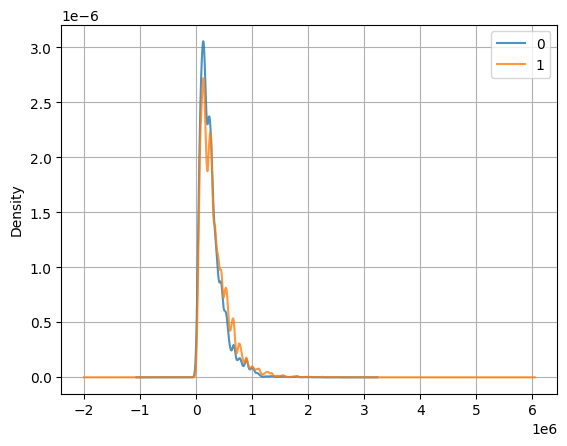

In [31]:
trte.groupby('data')['AMT_CREDIT-d-CNT_FAM_MEMBERS'].plot(kind='kde', legend=True, alpha=0.8, grid=True)

data
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: object

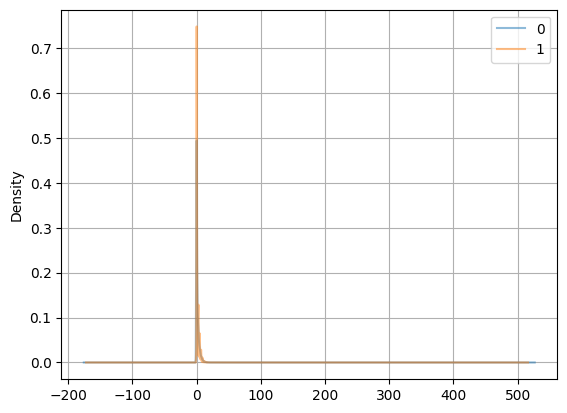

In [33]:
trte.groupby('data')['OBS_60_CNT_SOCIAL_CIRCLE'].plot(kind='kde', legend=True, alpha=0.5, grid=True)

In [39]:
trte[trte["data"]==1].to_pickle(ROOT + "/data/processed/f001_train.p")

In [40]:
trte[trte["data"]==0].to_pickle(ROOT + "/data/processed/f001_test.p")